In [2]:
pwd

'/content'

#Connet to GPU


In [1]:
!nvidia-smi

Tue Apr 23 12:34:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Import YOLO


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


Predictions using YOLO v8

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 82.3MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 33.8MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 245.0ms
Speed: 14.3ms preprocess, 245.0ms inference, 750.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


This saves in runs/detect/predict


/content


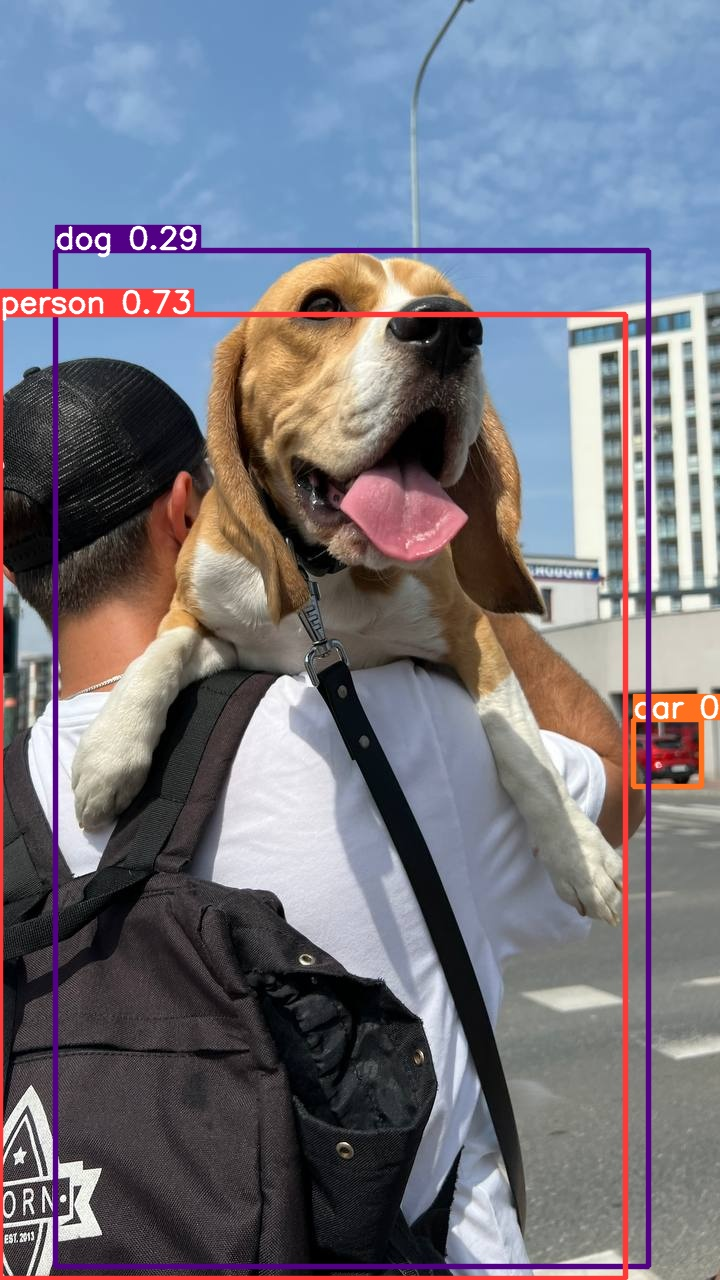

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/Screenshot_20230222_152244.png" save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/Screenshot_20230222_152244.png: 448x640 1 person, 1 bird, 107.5ms
Speed: 4.9ms preprocess, 107.5ms inference, 537.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


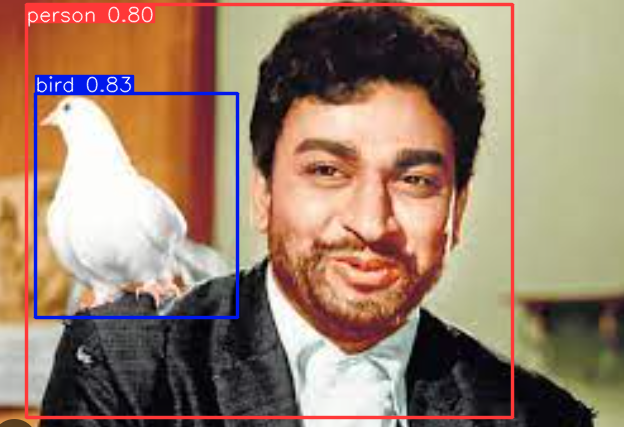

In [11]:
%cd {HOME}
Image(filename="/content/runs/detect/predict3/Screenshot_20230222_152244.png", height=600)

#datset Importing

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="nVqVokqcZw56QzufoOOo")
project = rf.workspace("anant-yu2b9").project("myproject-sea25")
version = project.version(4)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to myproject-4 in yolov8:: 100%|██████████| 1974/1974 [00:00<00:00, 3750.62it/s]


#Training Task


In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 128MB/s] 
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/myproject-4/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buff

In [14]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1713875964.15ecd4f81b58.1928.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1620.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1621.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1622.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


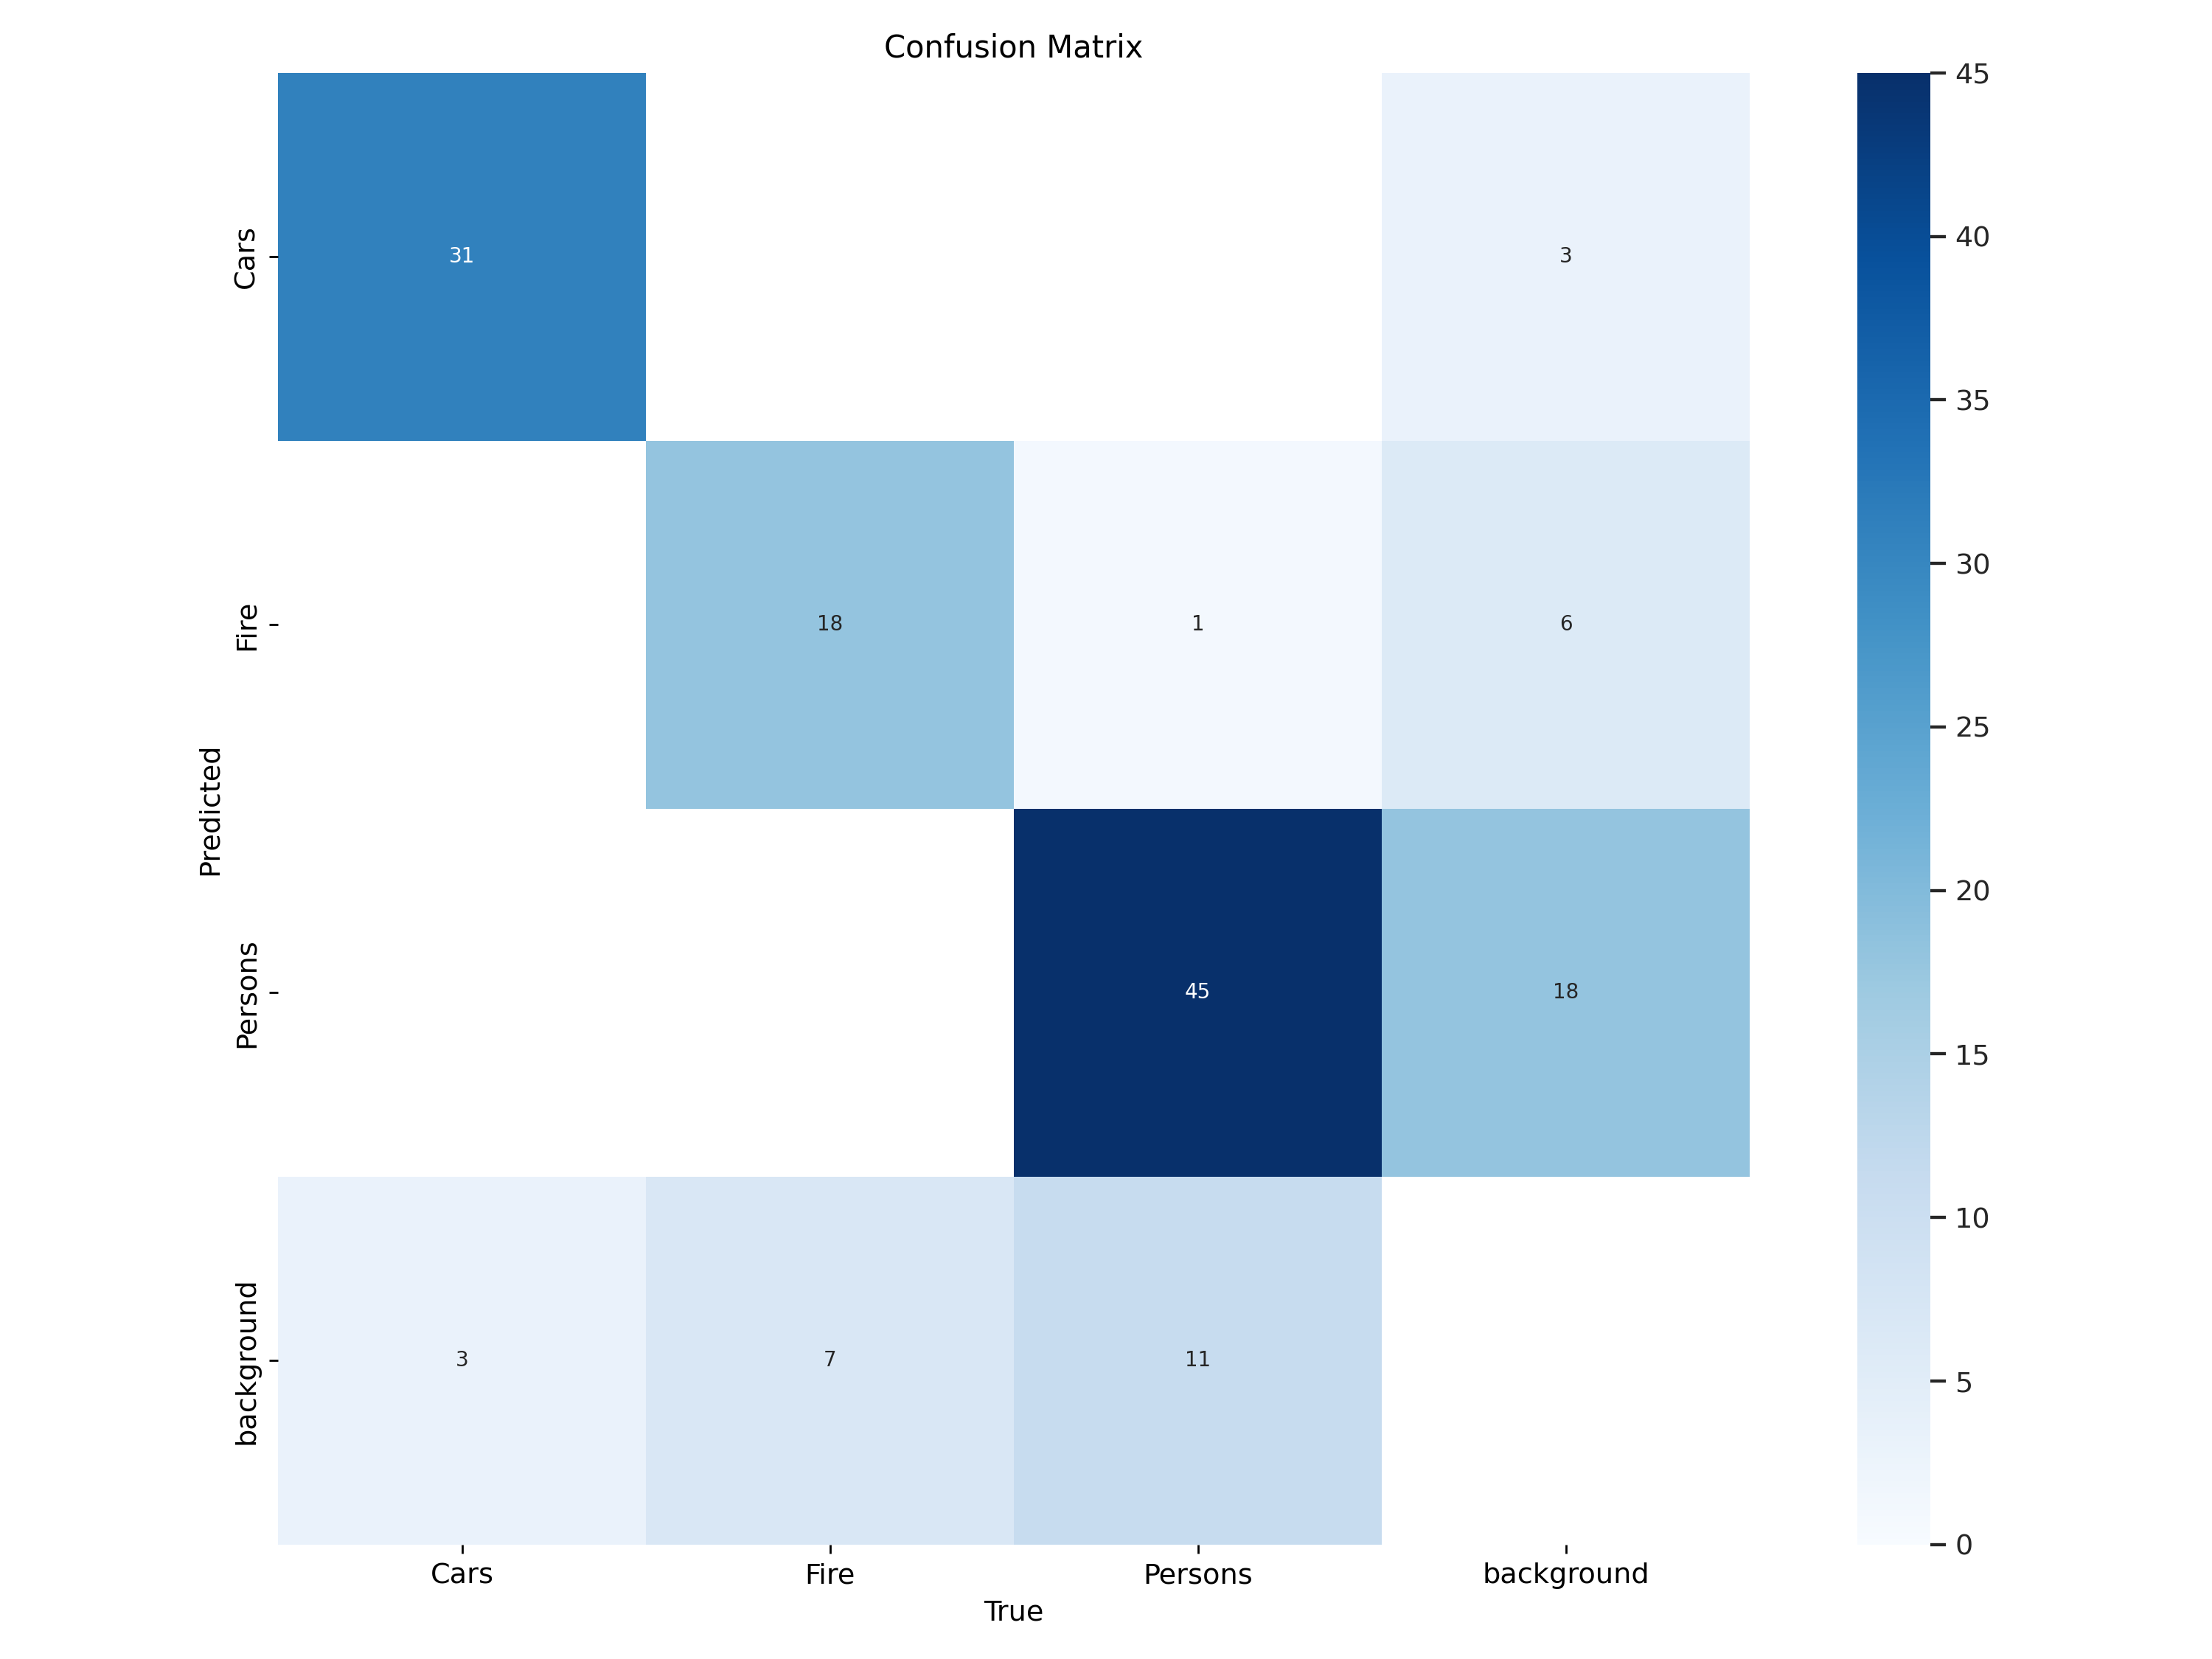

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


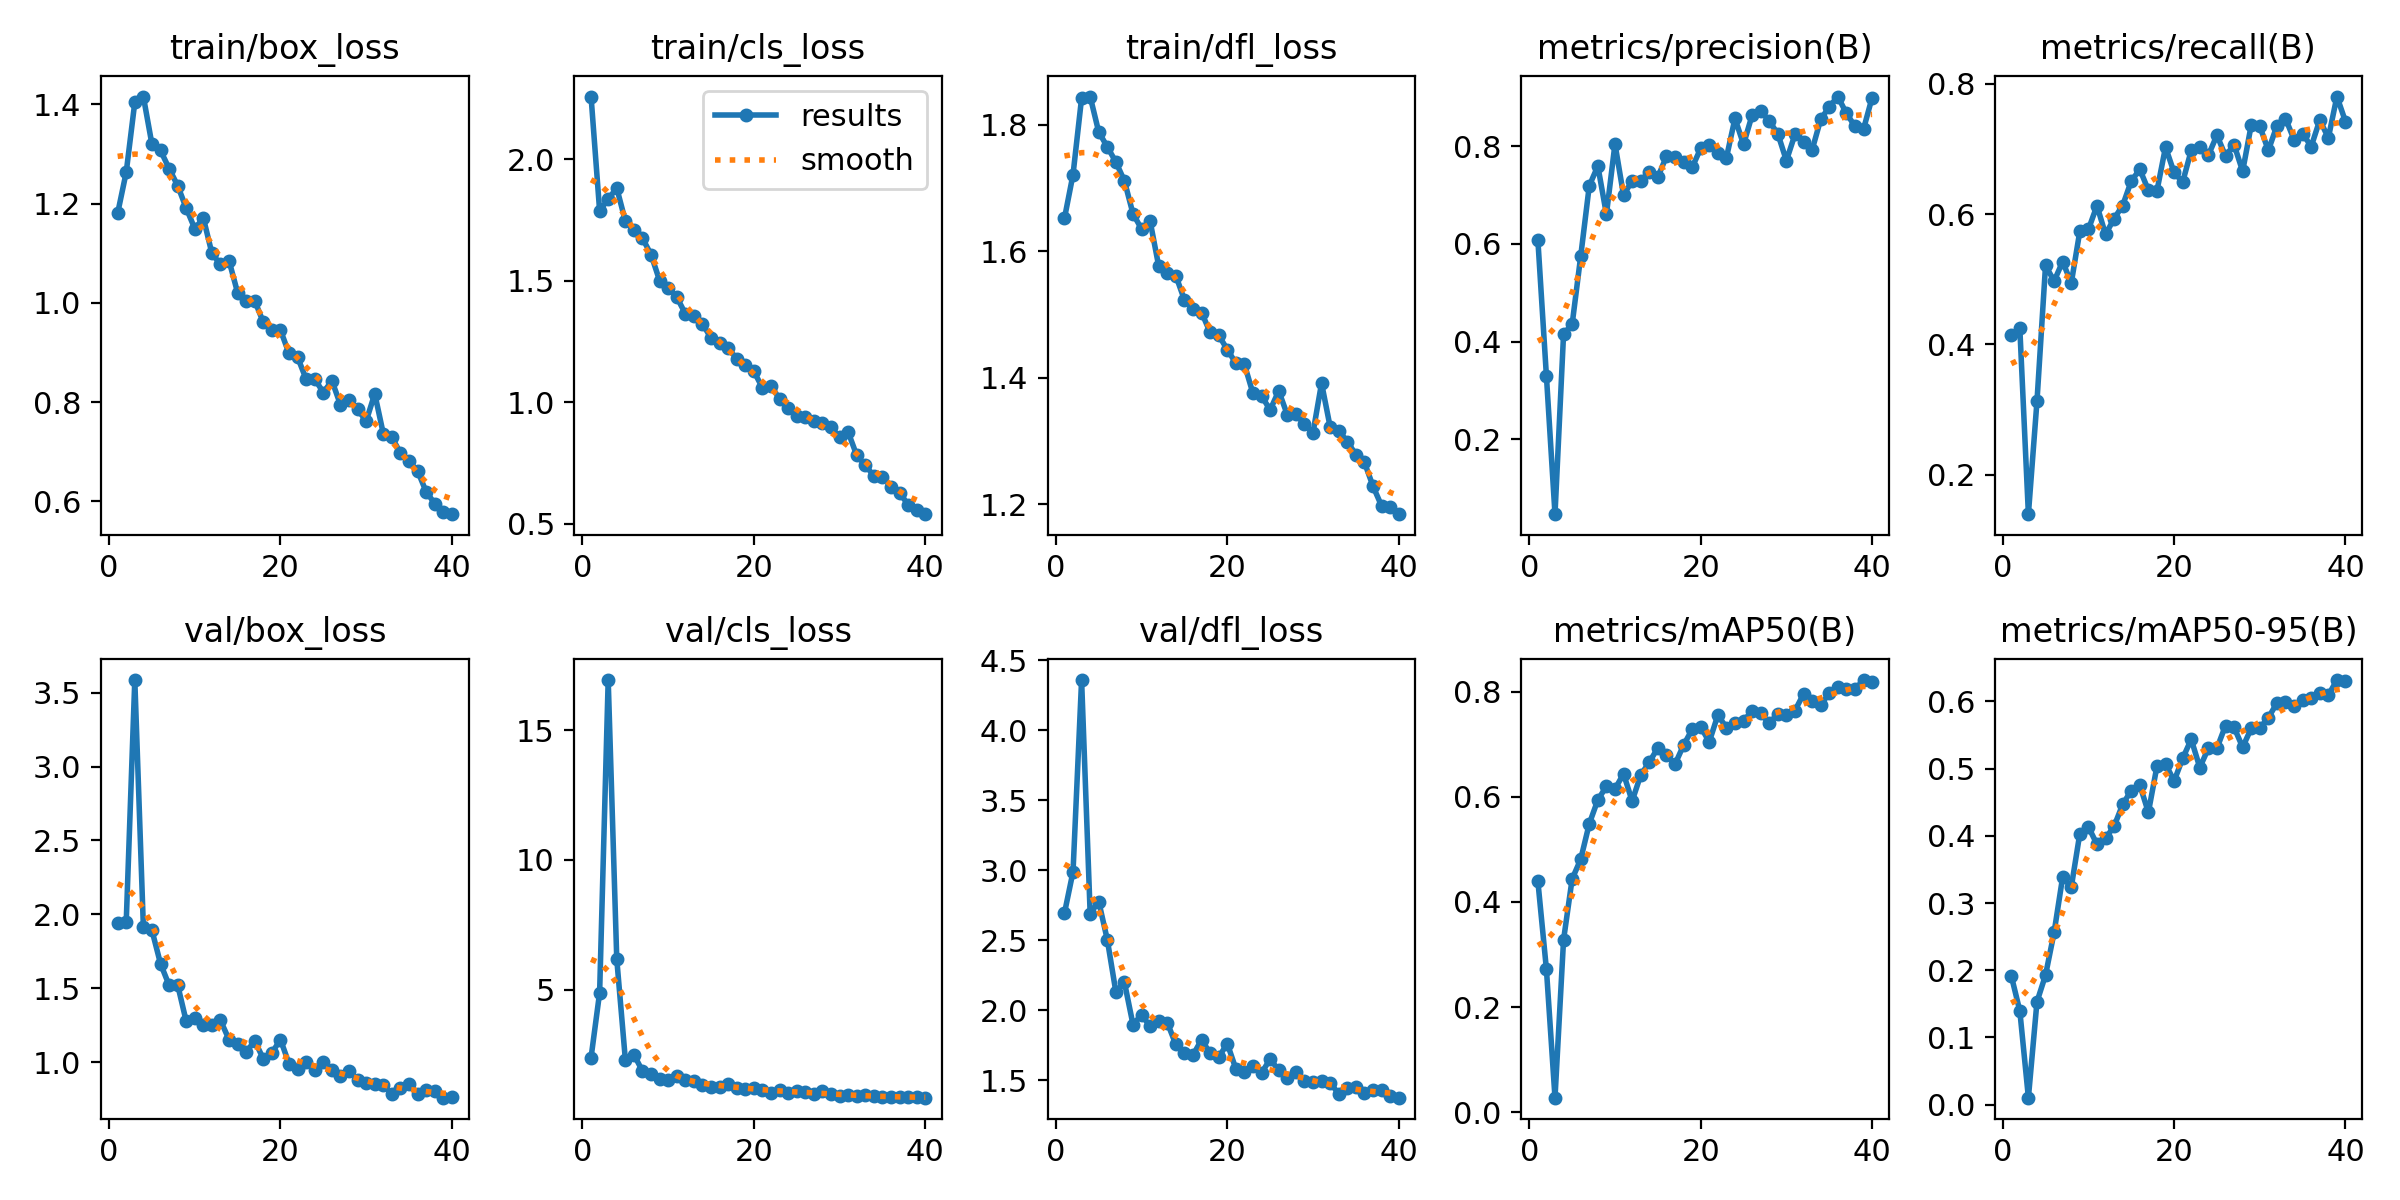

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


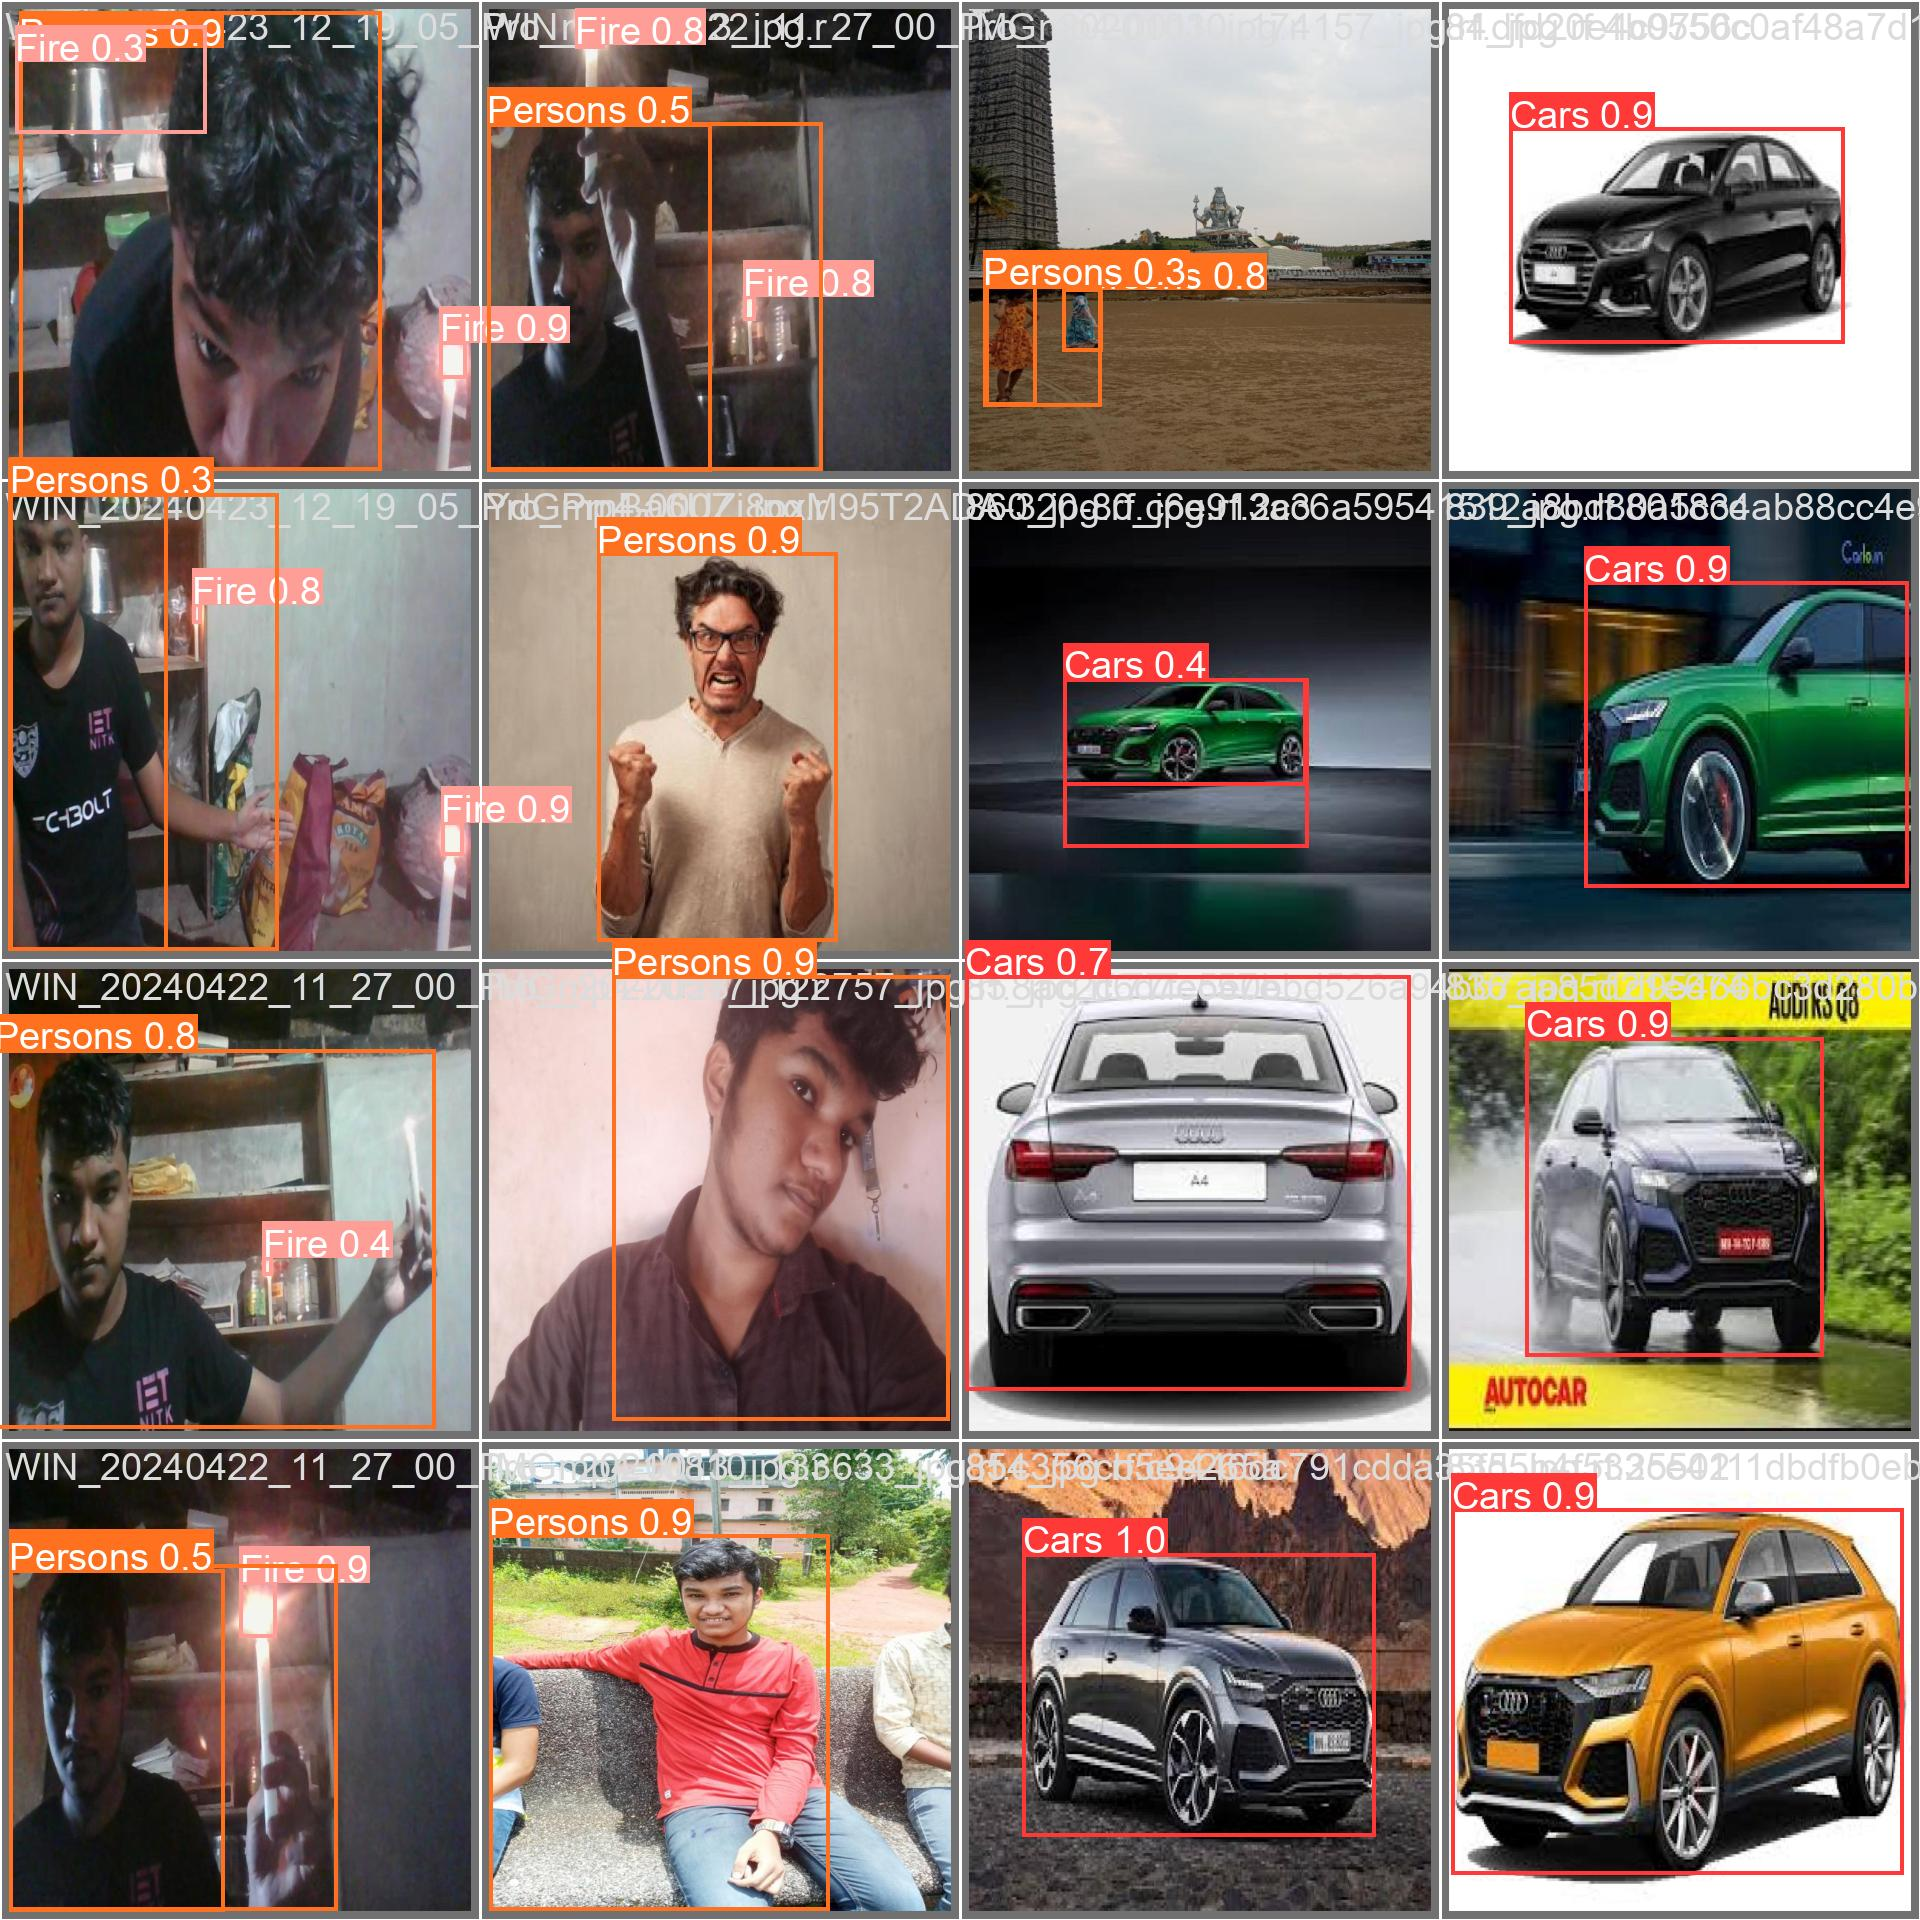

In [38]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


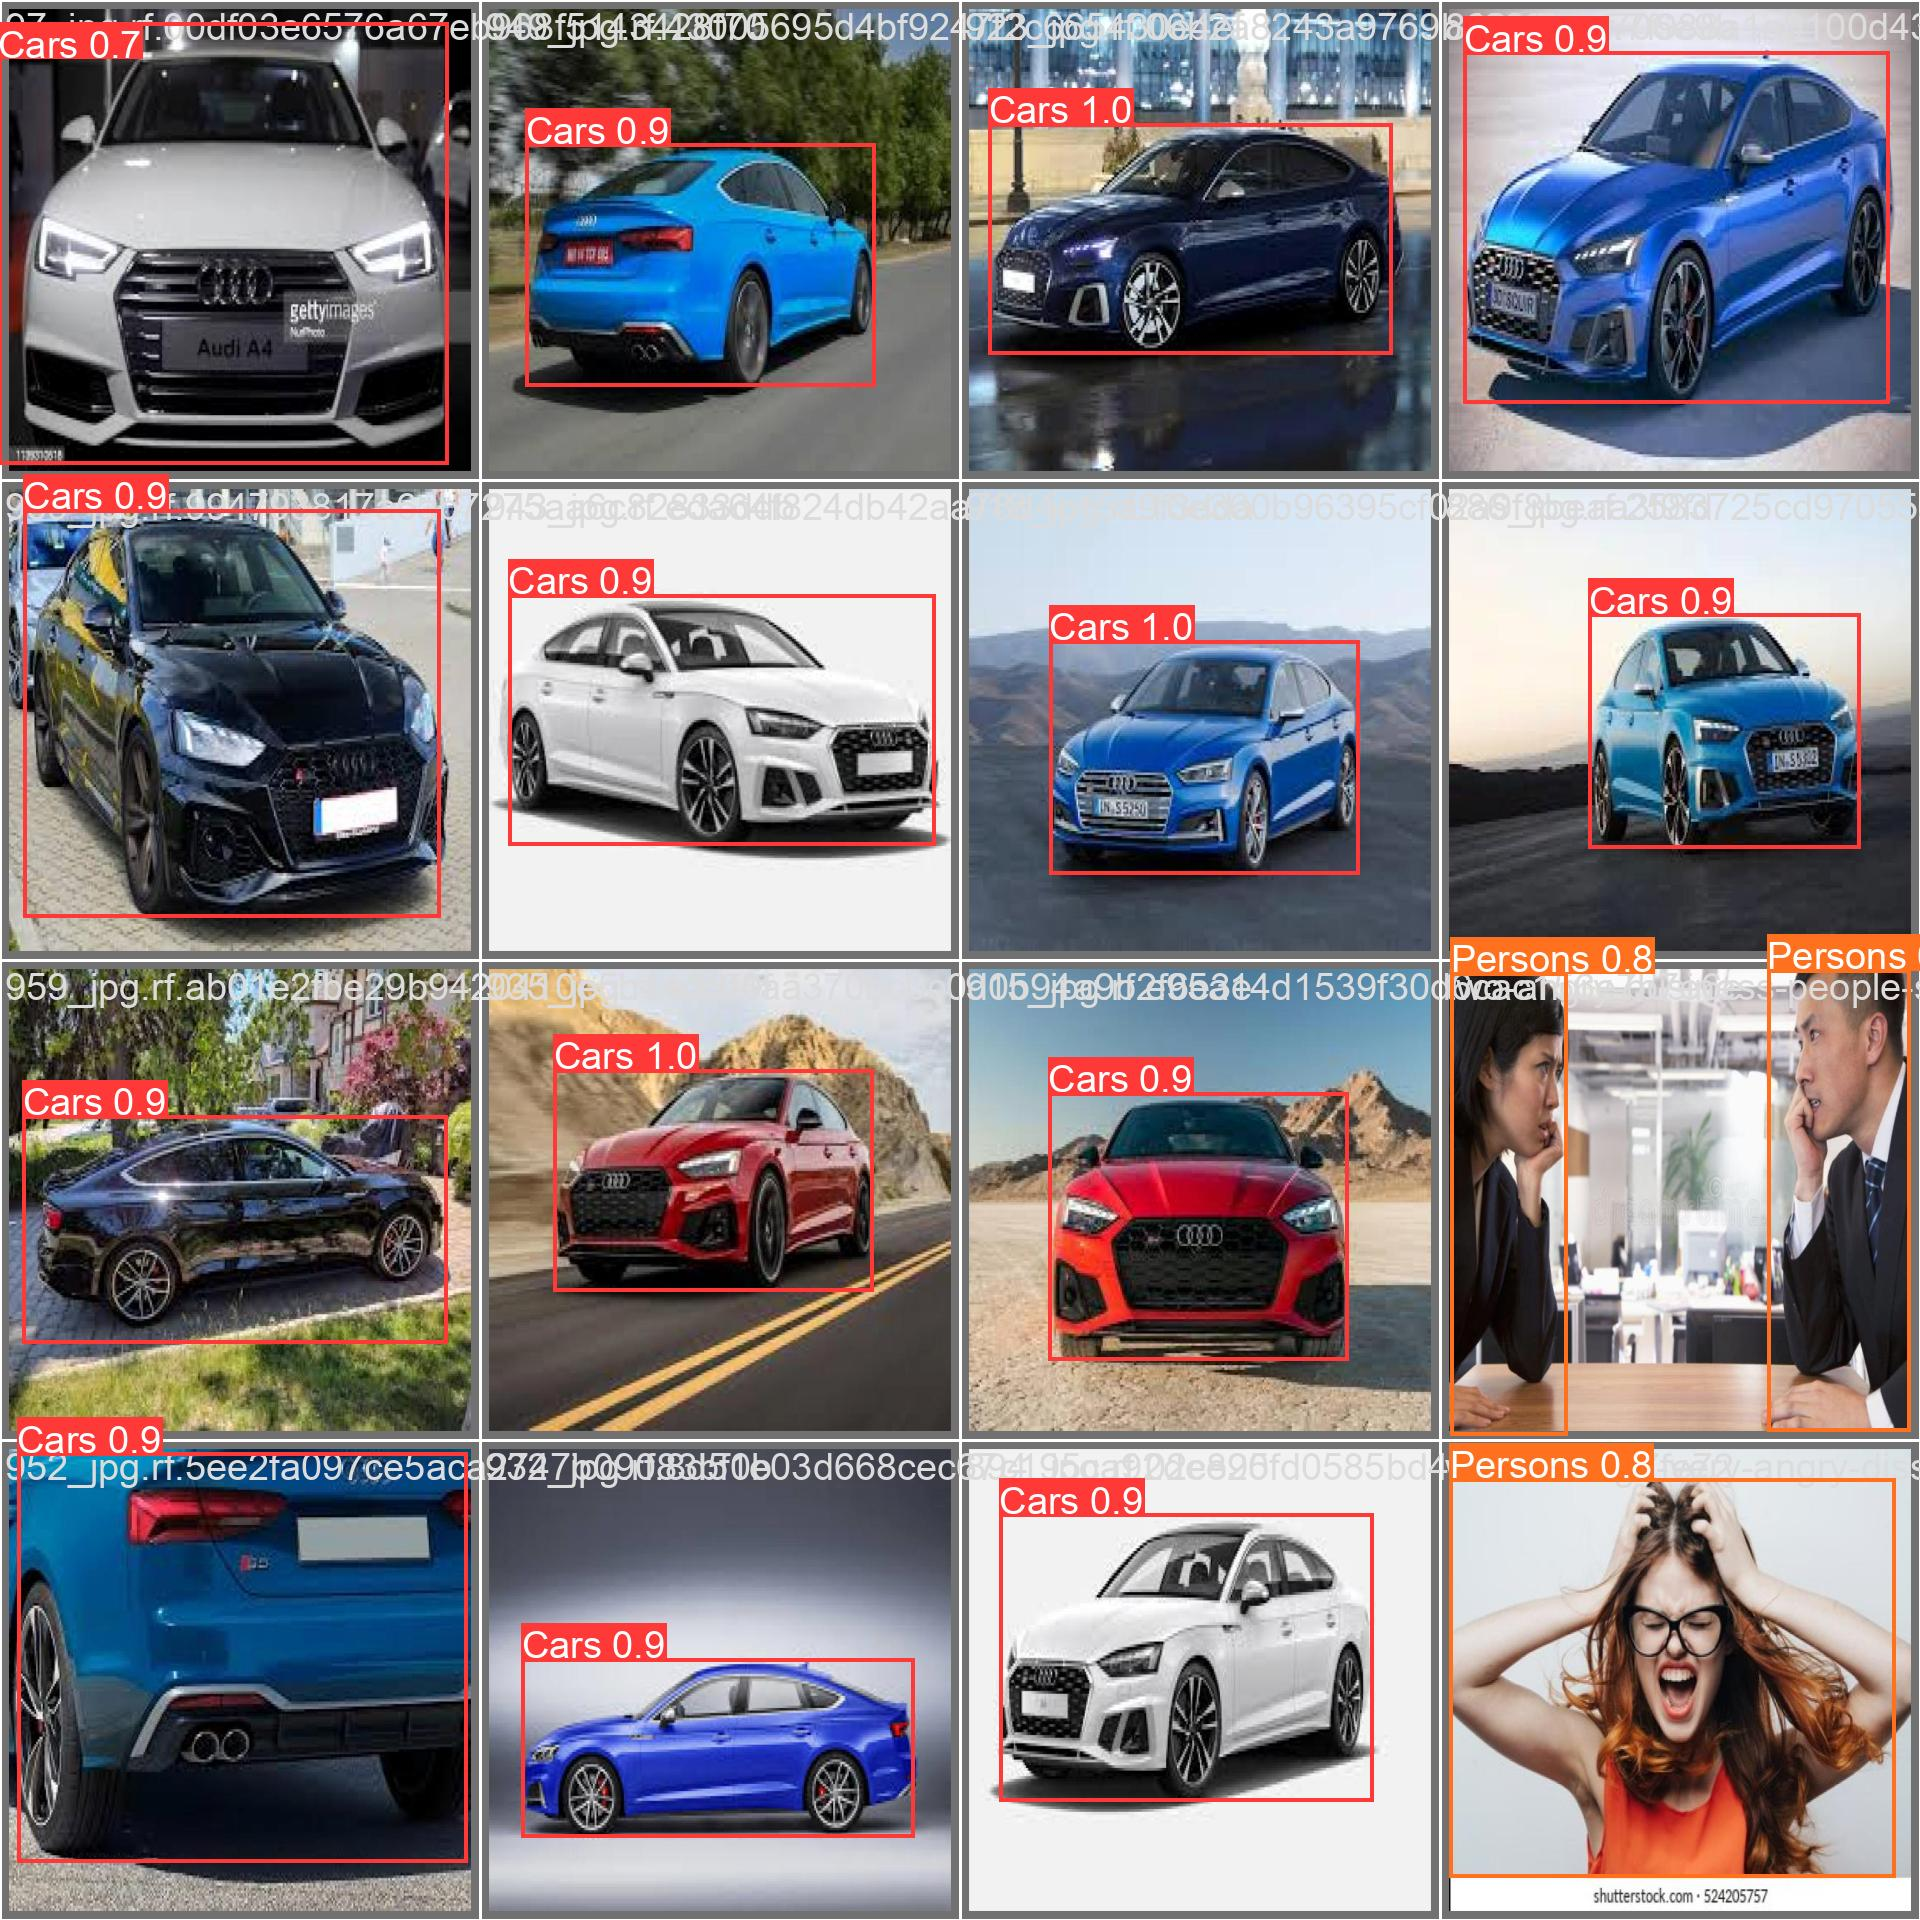

In [40]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/myproject-4/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100% 80/80 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 116. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.08s/it]
                   all         80        116      0.843       0.

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/41 /content/datasets/myproject-4/test/images/109_jpg.rf.91f74fc07928f2c5c9d27afc08726d29.jpg: 800x800 3 Fires, 22.5ms
image 2/41 /content/datasets/myproject-4/test/images/12_jpg.rf.242ad49c53452de7e975072c4661d718.jpg: 800x800 2 Fires, 22.5ms
image 3/41 /content/datasets/myproject-4/test/images/170404-happy-workers-feature_jpg.rf.d65b97d1eb6d45bb1d5a244316c44965.jpg: 800x800 6 Personss, 22.4ms
image 4/41 /content/datasets/myproject-4/test/images/1O2A3334_JPG.rf.e5fd0638328ddef83f8545bd67643fb0.jpg: 800x800 2 Personss, 22.4ms
image 5/41 /content/datasets/myproject-4/test/images/812_jpg.rf.a7f252bb20d58ed696f446cd222dc03c.jpg: 800x800 1 Cars, 22.4ms
image 6/41 /content/datasets/myproject-4/test/images/817_jpg.rf.b81f346afb83fb26f94a67be5b53e2ed.jpg: 800x800 1 Cars, 22.1ms
image 7/41 /content/datasets/myp

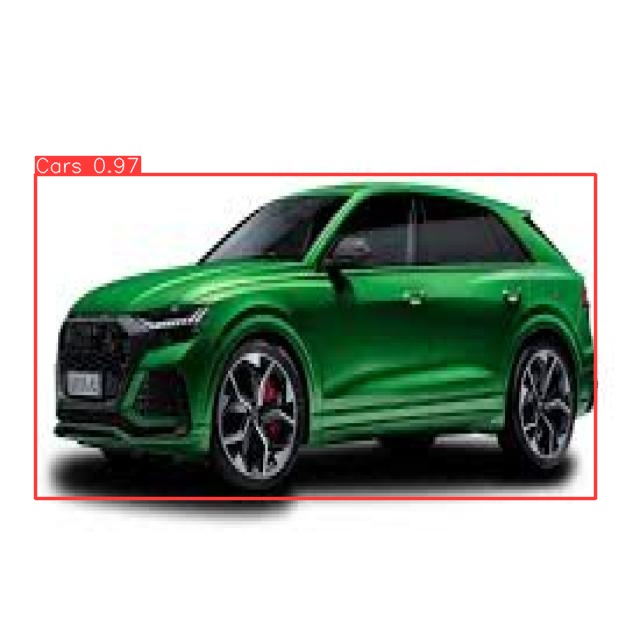

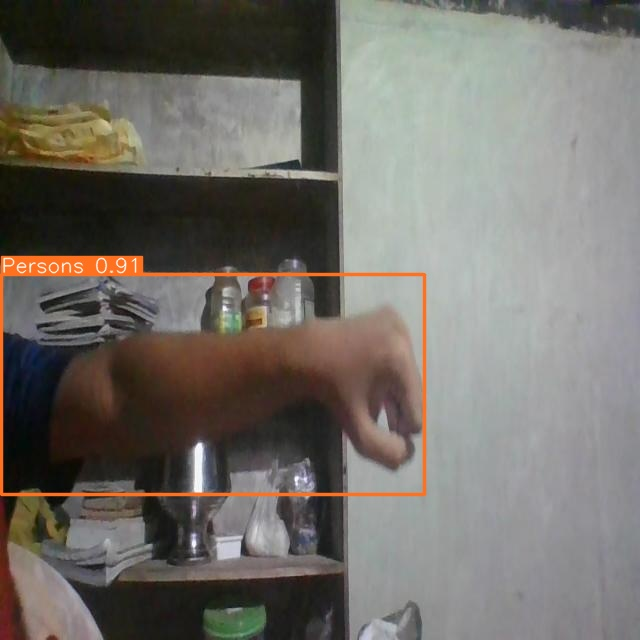

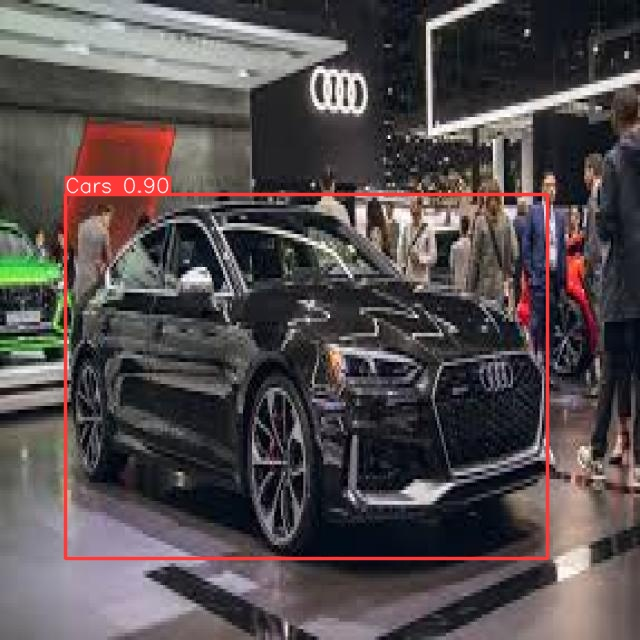

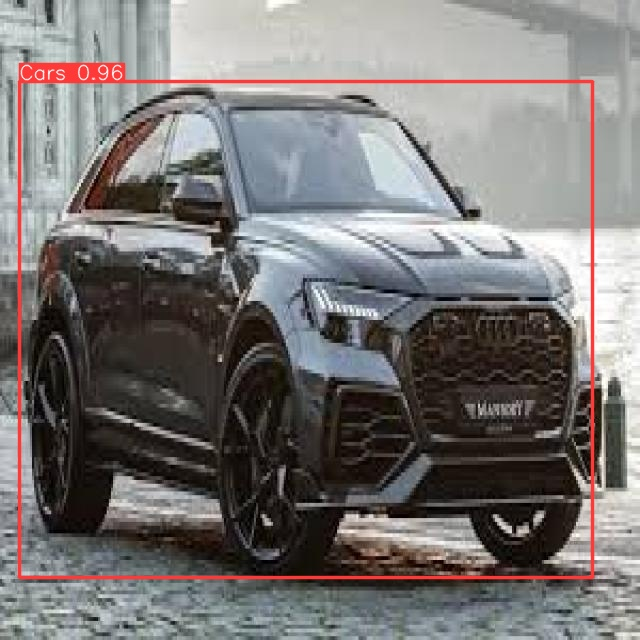

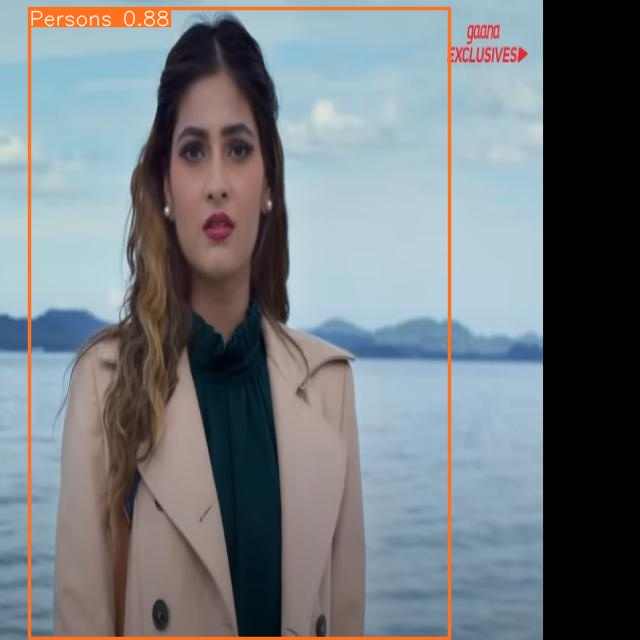

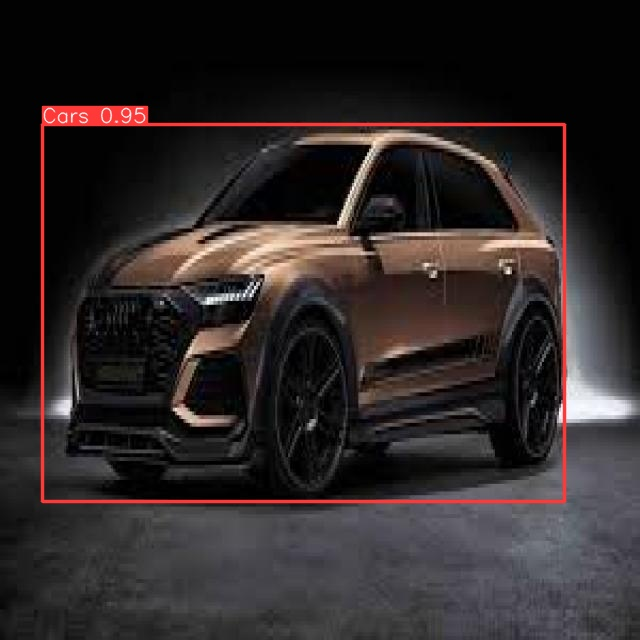

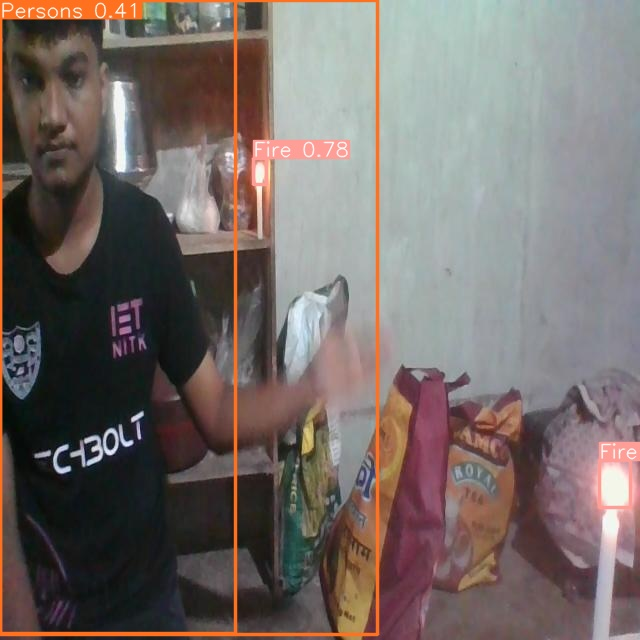

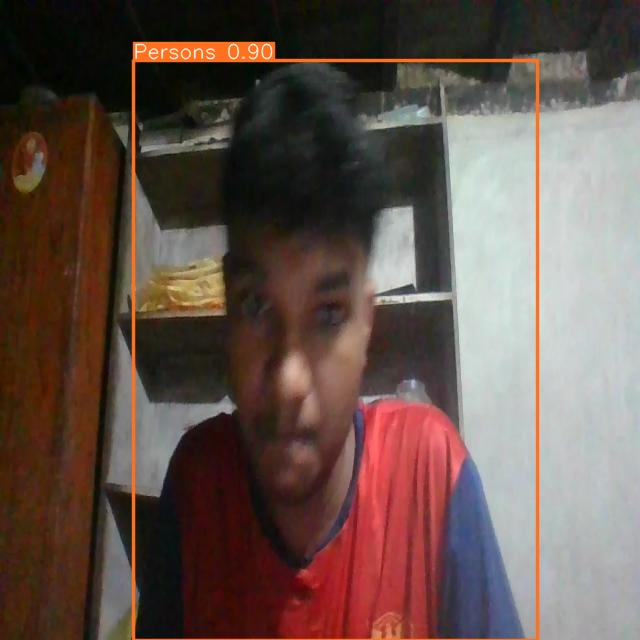

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[17:25]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/anant-yu2b9/myproject-sea25/4
Share your model with the world at: https://universe.roboflow.com/anant-yu2b9/myproject-sea25/model/4


In [31]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 853_jpg.rf.dbcc76e1e5186cd2e6671e21ced8e61f.jpg


{'predictions': [{'x': 315.0,
   'y': 326.0,
   'width': 588.0,
   'height': 490.0,
   'confidence': 0.9291433691978455,
   'class': 'Cars',
   'class_id': 0,
   'detection_id': 'f3a17f57-157f-455b-8d9c-e818cacb3c4f',
   'image_path': '/content/datasets/myproject-4/test/images/853_jpg.rf.dbcc76e1e5186cd2e6671e21ced8e61f.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

##The Result

/content


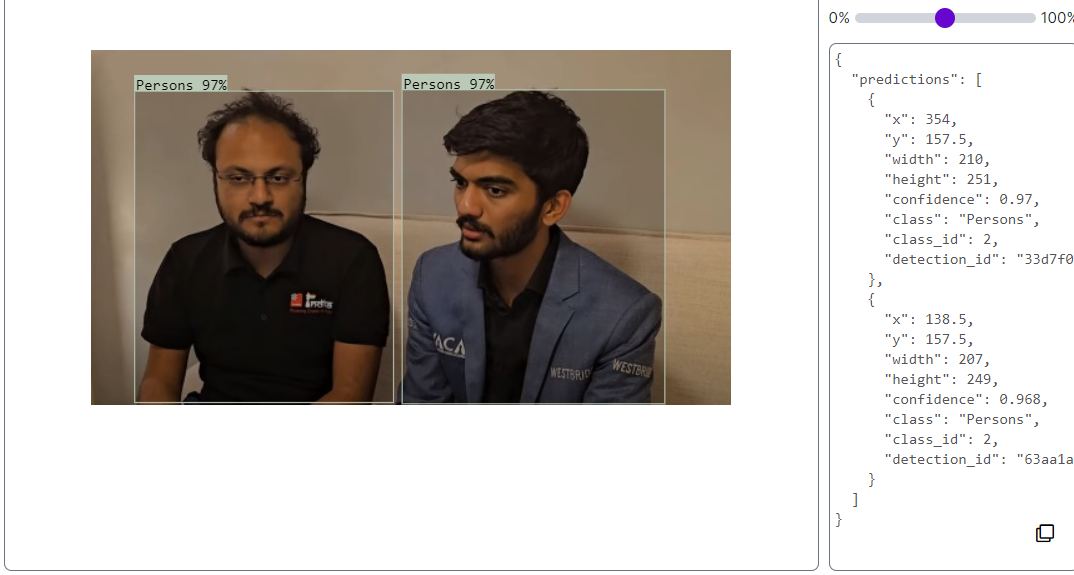

In [32]:
#This is from model deployed
%cd {HOME}
Image(filename="/content/Screenshot 2024-04-23 184144.png", width=600)

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source=/content/Screenshot_20230222_152244.png save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Screenshot_20230222_152244.png: 576x800 1 Persons, 98.7ms
Speed: 6.6ms preprocess, 98.7ms inference, 468.9ms postprocess per image at shape (1, 3, 576, 800)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


Our model doesnt recognise birds

/content


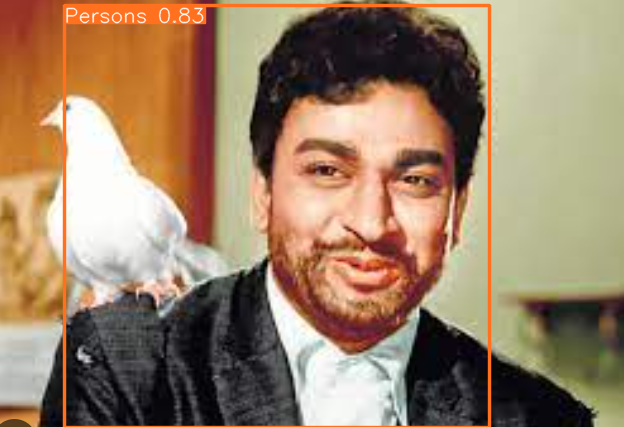

In [35]:
%cd {HOME}
Image(filename="/content/runs/detect/predict5/Screenshot_20230222_152244.png", width=600)